# Exploratory Data Analysis/Visualization 

## Load Packages

In [1]:
!pip install optuna 

import numpy as np
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import zscore
from scipy import fftpack
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import optuna


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Files

In [2]:
accel = pd.read_parquet("all_acceleration.parquet.gzip")
lin_accel = pd.read_parquet("all_lin_acceleration.parquet.gzip")
baro = pd.read_parquet("all_barometer.parquet.gzip")
gyro = pd.read_parquet("all_gyroscope.parquet.gzip")

## Box Plots (Figure 2)

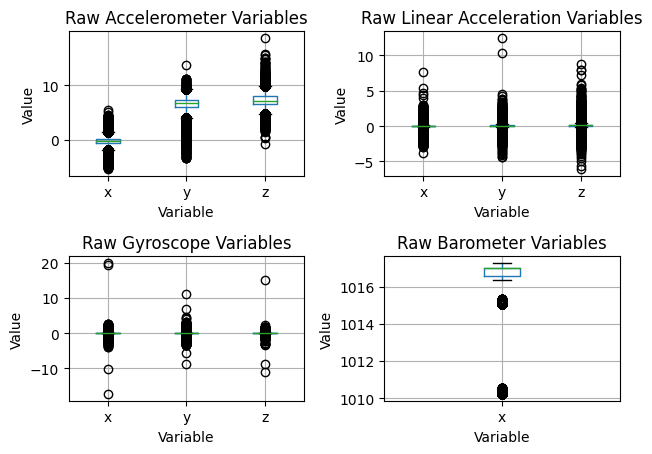

In [6]:
plt.subplot(2, 2, 1)
accel.iloc[:,1:].boxplot()
plt.title('Raw Accelerometer Variables')
plt.suptitle('')  # Suppress the automatic title to keep the plot clean
plt.xlabel('Variable')
plt.ylabel('Value')

plt.subplot(2, 2, 2)
lin_accel.iloc[:,1:].boxplot()
plt.title('Raw Linear Acceleration Variables')
plt.suptitle('')  # Suppress the automatic title to keep the plot clean
plt.xlabel('Variable')
plt.ylabel('Value')

plt.subplot(2, 2, 3)
gyro.iloc[:,1:].boxplot()
plt.title('Raw Gyroscope Variables')
plt.suptitle('')  # Suppress the automatic title to keep the plot clean
plt.xlabel('Variable')
plt.ylabel('Value')

plt.subplot(2, 2, 4)
baro.iloc[:,1:].boxplot()
plt.title('Raw Barometer Variables')
plt.suptitle('')  # Suppress the automatic title to keep the plot clean
plt.xlabel('Variable')
plt.ylabel('Value')

plt.tight_layout()

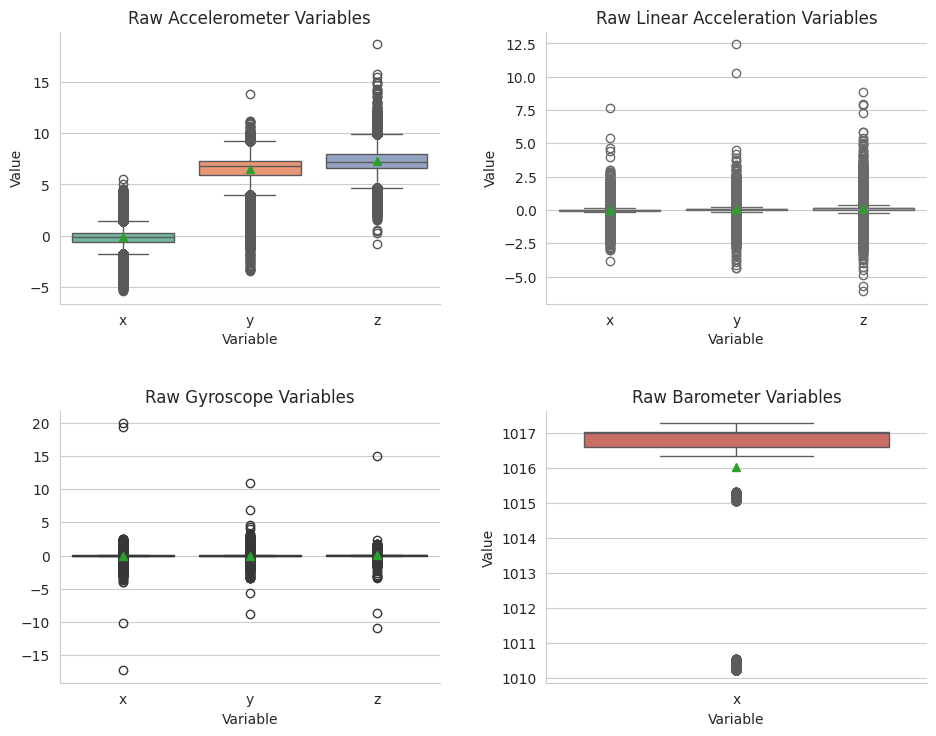

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for aesthetics

# Example data (replace with your actual data)
accel = accel.select_dtypes(include='number')
lin_accel = lin_accel.select_dtypes(include='number')
gyro = gyro.select_dtypes(include='number')
baro = baro.select_dtypes(include='number')

# Define subplots with seaborn color palette
sns.set_style("whitegrid")  # Set seaborn theme (optional)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot each subplot with customizations
sns.boxplot(
    data=accel,
    ax=axs[0, 0],
    showmeans=True,  # Show mean as a point
    palette="Set2"  # Use seaborn color palette
)
axs[0, 0].set_title('Raw Accelerometer Variables')
axs[0, 0].set_xlabel('Variable')
axs[0, 0].set_ylabel('Value')

sns.boxplot(
    data=lin_accel,
    ax=axs[0, 1],
    showmeans=True,
    palette="Set3"
)
axs[0, 1].set_title('Raw Linear Acceleration Variables')
axs[0, 1].set_xlabel('Variable')
axs[0, 1].set_ylabel('Value')

sns.boxplot(
    data=gyro,
    ax=axs[1, 0],
    showmeans=True,
    palette="Dark2"
)
axs[1, 0].set_title('Raw Gyroscope Variables')
axs[1, 0].set_xlabel('Variable')
axs[1, 1].set_ylabel('Value')

sns.boxplot(
    data=baro,
    ax=axs[1, 1],
    showmeans=True,
    palette="hls"
)
axs[1, 1].set_title('Raw Barometer Variables')
axs[1, 1].set_xlabel('Variable')
axs[1, 1].set_ylabel('Value')

# Adjust layout and remove spines
plt.tight_layout(pad=3.0)
for ax in axs.flat:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# Suppress the overall title
plt.suptitle('')

# Display the plot
plt.show()

## Raw Timeseries Plot for the Data (Figure 4)

In [9]:
accel = pd.read_parquet("all_acceleration.parquet.gzip")
lin_accel = pd.read_parquet("all_lin_acceleration.parquet.gzip")
baro = pd.read_parquet("all_barometer.parquet.gzip")
gyro = pd.read_parquet("all_gyroscope.parquet.gzip")

In [10]:
print(accel.columns)
print(baro.columns)
print(gyro.columns)
print(lin_accel.columns)

Index(['time', 'x', 'y', 'z', 'source_name'], dtype='object')
Index(['time', 'x', 'source_name'], dtype='object')
Index(['time', 'x', 'y', 'z', 'source_name'], dtype='object')
Index(['time', 'x', 'y', 'z', 'source_name'], dtype='object')


In [11]:
accel.set_index('time', inplace=True)
baro.set_index('time', inplace=True)
gyro.set_index('time', inplace=True)
lin_accel.set_index('time', inplace=True)

In [12]:
datasets = [accel, baro, gyro, lin_accel]
dataset_names = ['Accelerometer', 'Barometer', 'Gyroscope', 'Linear Acceleration']

/tmp/ipykernel_686/340381032.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


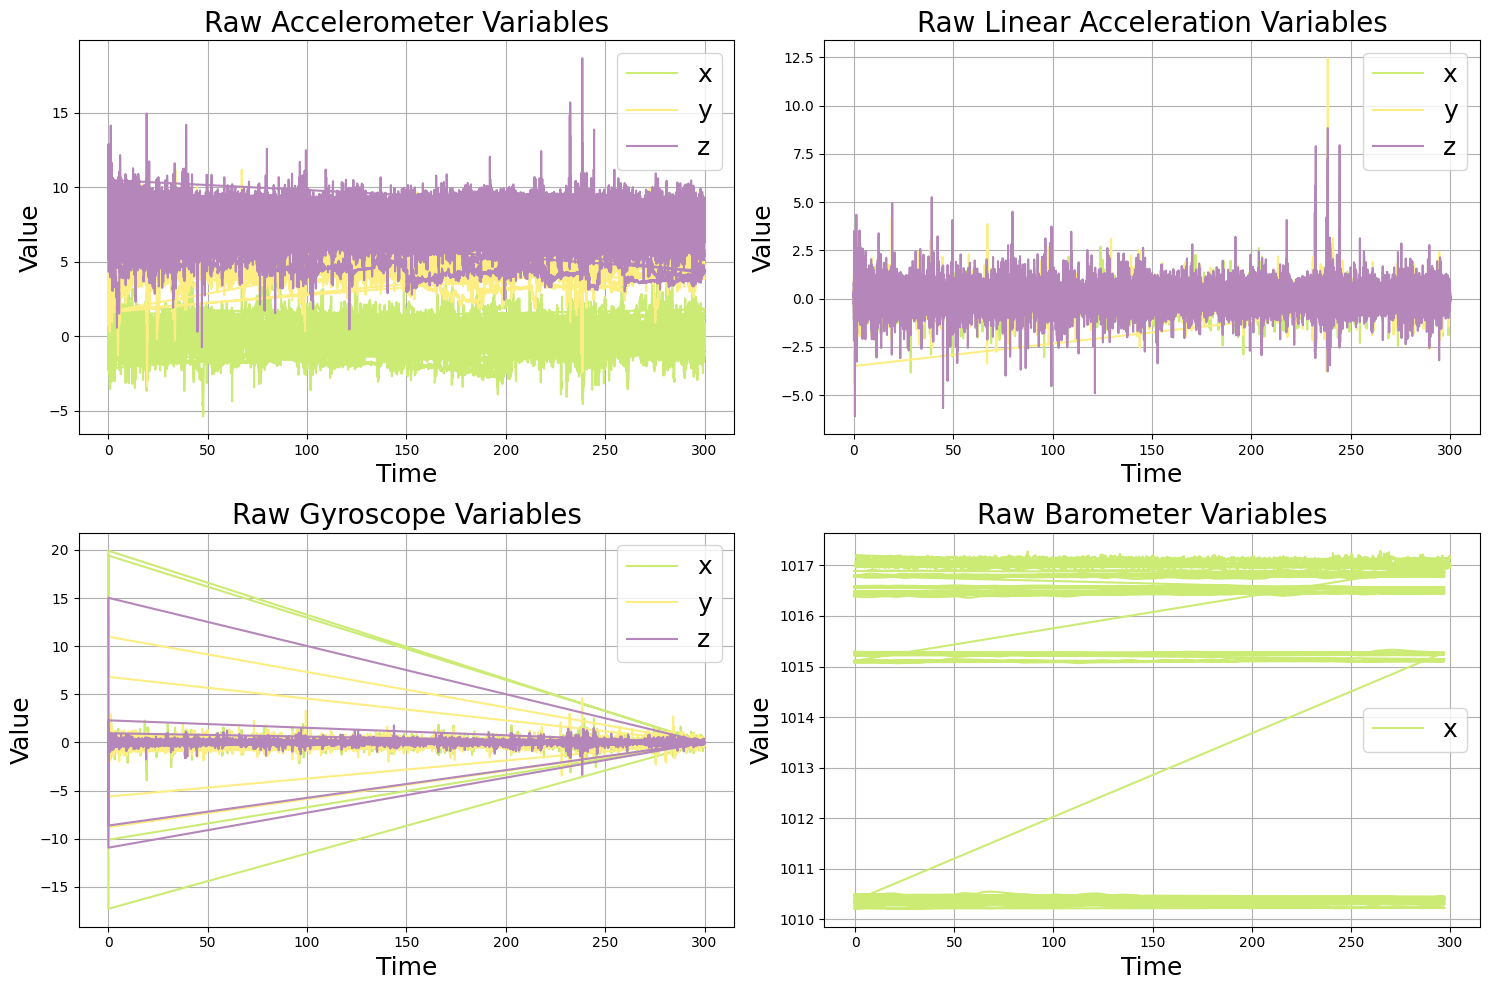

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for aesthetics

# Example datasets and dataset names (replace with your actual data)
datasets = [accel, lin_accel, gyro, baro]
dataset_names = ['Raw Accelerometer Variables', 'Raw Linear Acceleration Variables', 'Raw Gyroscope Variables', 'Raw Barometer Variables']

# Create a larger figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define custom color palette with green from Set3, light yellow, and purple
custom_colors_swapped_final = [(0.8, 0.922, 0.459), (0.988, 0.933, 0.515), (0.706, 0.524, 0.727)]
columns = ['x', 'y', 'z']

# Loop through datasets and plot each variable with separate lines on subplots
for i, (data, name) in enumerate(zip(datasets, dataset_names)):
    for j, col in enumerate(columns):
        if col in data.columns:
            data[col].plot(ax=axs[i // 2, i % 2], color=custom_colors_swapped_final[j], label=f"{col}")
    axs[i // 2, i % 2].set_title(name, fontsize=20) #Add title with larger font size 
    axs[i // 2, i % 2].legend(fontsize=18)  # Add legend with larger font size
    axs[i // 2, i % 2].grid(True)  # Add gridlines (optional)
    axs[i // 2, i % 2].set_xlabel('Time', fontsize=18)  # Label x-axis with larger font size
    axs[i // 2, i % 2].set_ylabel('Value', fontsize=18)  # Label y-axis with larger font size

# Adjust layout
plt.tight_layout()

# Optional: Add a y-axis label if applicable to all datasets
# plt.ylabel('Measurement Value')  # Uncomment if applicable

plt.show()


/tmp/ipykernel_686/3666117154.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


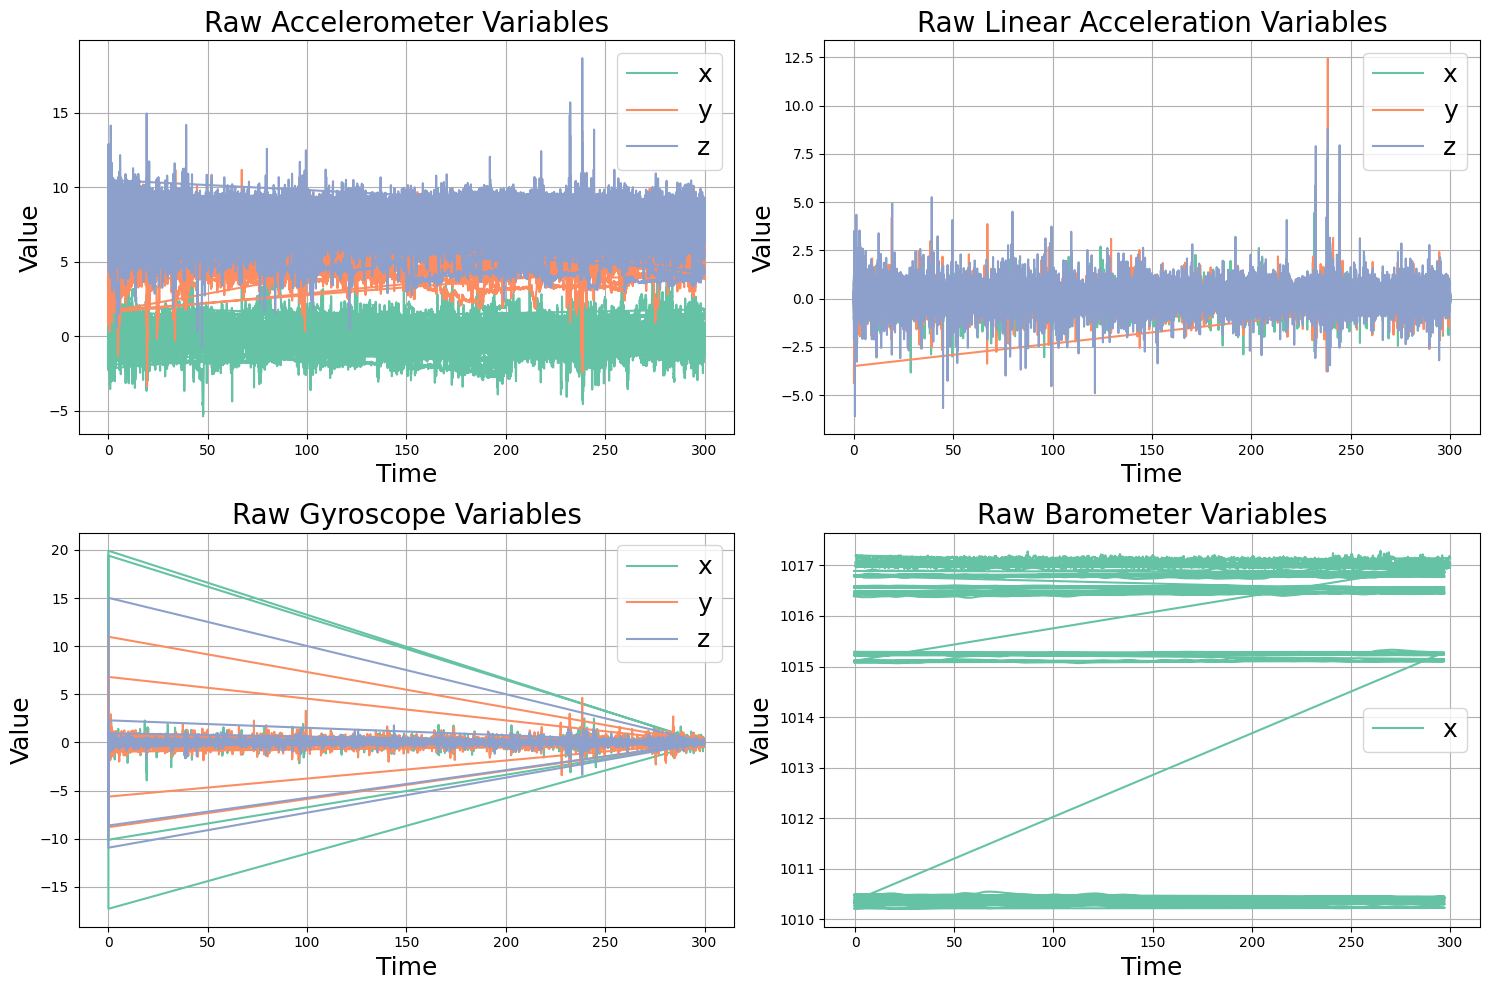

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for aesthetics

# Example datasets and dataset names (replace with your actual data)
datasets = [accel, lin_accel, gyro, baro]
dataset_names = ['Raw Accelerometer Variables', 'Raw Linear Acceleration Variables', 'Raw Gyroscope Variables', 'Raw Barometer Variables']

# Create a larger figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define color palette from Set2 with 3 distinct colors for x, y, z
color_palette = sns.color_palette("Set2", n_colors=3)
columns = ['x', 'y', 'z']

# Loop through datasets and plot each variable with separate lines on subplots
for i, (data, name) in enumerate(zip(datasets, dataset_names)):
    for j, col in enumerate(columns):
        if col in data.columns:
            data[col].plot(ax=axs[i // 2, i % 2], color=color_palette[j], label=f"{col}")
    axs[i // 2, i % 2].set_title(name, fontsize=20)  # Add title with larger font size
    axs[i // 2, i % 2].legend(fontsize=18)  # Add legend with larger font size
    axs[i // 2, i % 2].grid(True)  # Add gridlines (optional)
    axs[i // 2, i % 2].set_xlabel('Time', fontsize=18)  # Label x-axis with larger font size
    axs[i // 2, i % 2].set_ylabel('Value', fontsize=18)  # Label y-axis with larger font size

# Adjust layout
plt.tight_layout()

# Optional: Add a y-axis label if applicable to all datasets
# plt.ylabel('Measurement Value')  # Uncomment if applicable

plt.show()


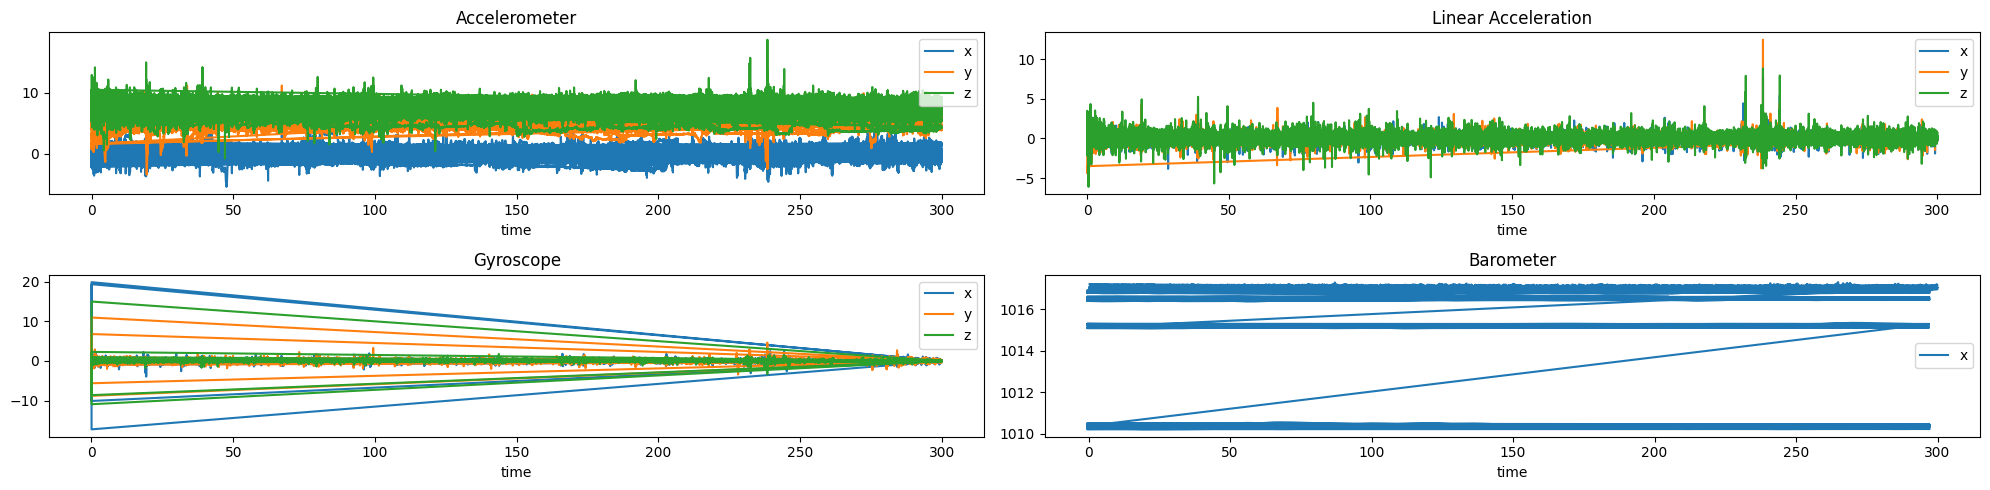

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(20, 5))

accel.plot(ax=axs[0,0])
axs[0,0].set_title('Accelerometer')

lin_accel.plot(ax=axs[0,1])
axs[0,1].set_title('Linear Acceleration')

# Plot dataset3 on the third subplot
gyro.plot(ax=axs[1,0])
axs[1,0].set_title('Gyroscope')

# Plot dataset4 on the fourth subplot
baro.plot(ax=axs[1,1])
axs[1,1].set_title('Barometer')

plt.tight_layout()

# PCA (Figure 5)

In [16]:
full_data = pd.read_parquet("full_dataset.parquet.gzip")

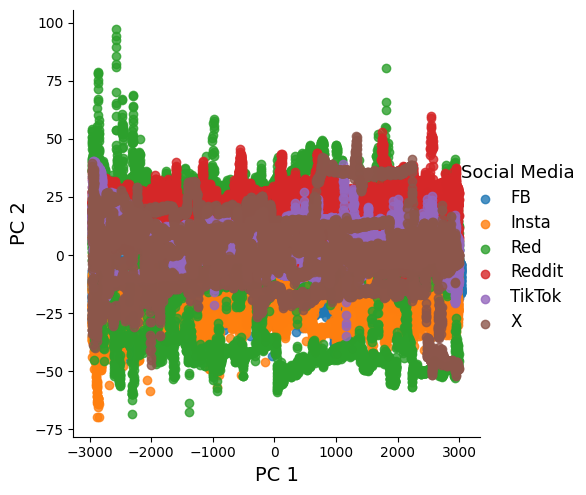

In [17]:
ax = sns.lmplot(x='pc_1', y='pc_2', data=full_data, 
                hue='SM_platform', fit_reg=False)

#plt.title('Most Important Two Principal Components in the Data')
ax.set_xlabels("PC 1",  fontsize=14)
ax.set_ylabels("PC 2",  fontsize=14)
ax._legend.set_title("Social Media")
plt.setp(ax._legend.get_texts(), fontsize=12)  # for legend text
plt.setp(ax._legend.get_title(), fontsize=13)  # for legend title

# Show the plot
plt.show()

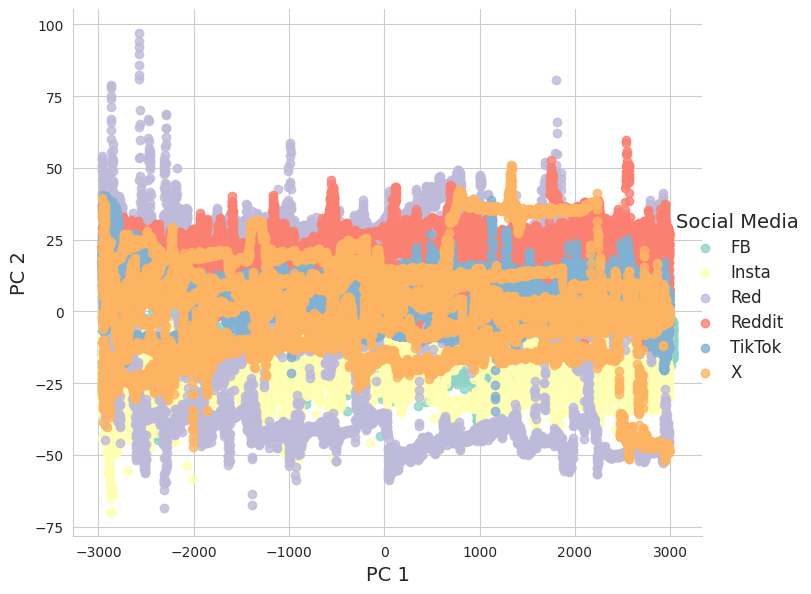

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the scatter plot with principal components using the Set2 color palette
ax = sns.lmplot(x='pc_1', y='pc_2', data=full_data, 
                hue='SM_platform', fit_reg=False, 
                palette="Set3", height=6, aspect=1.2)

# Customize the title and labels
#plt.title('Most Important Two Principal Components in the Data', fontsize=16)
ax.set_xlabels("PC 1", fontsize=14)
ax.set_ylabels("PC 2", fontsize=14)
ax._legend.set_title("Social Media")
plt.setp(ax._legend.get_texts(), fontsize=12)  # for legend text
plt.setp(ax._legend.get_title(), fontsize=14)  # for legend title

# Show the plot
plt.show()


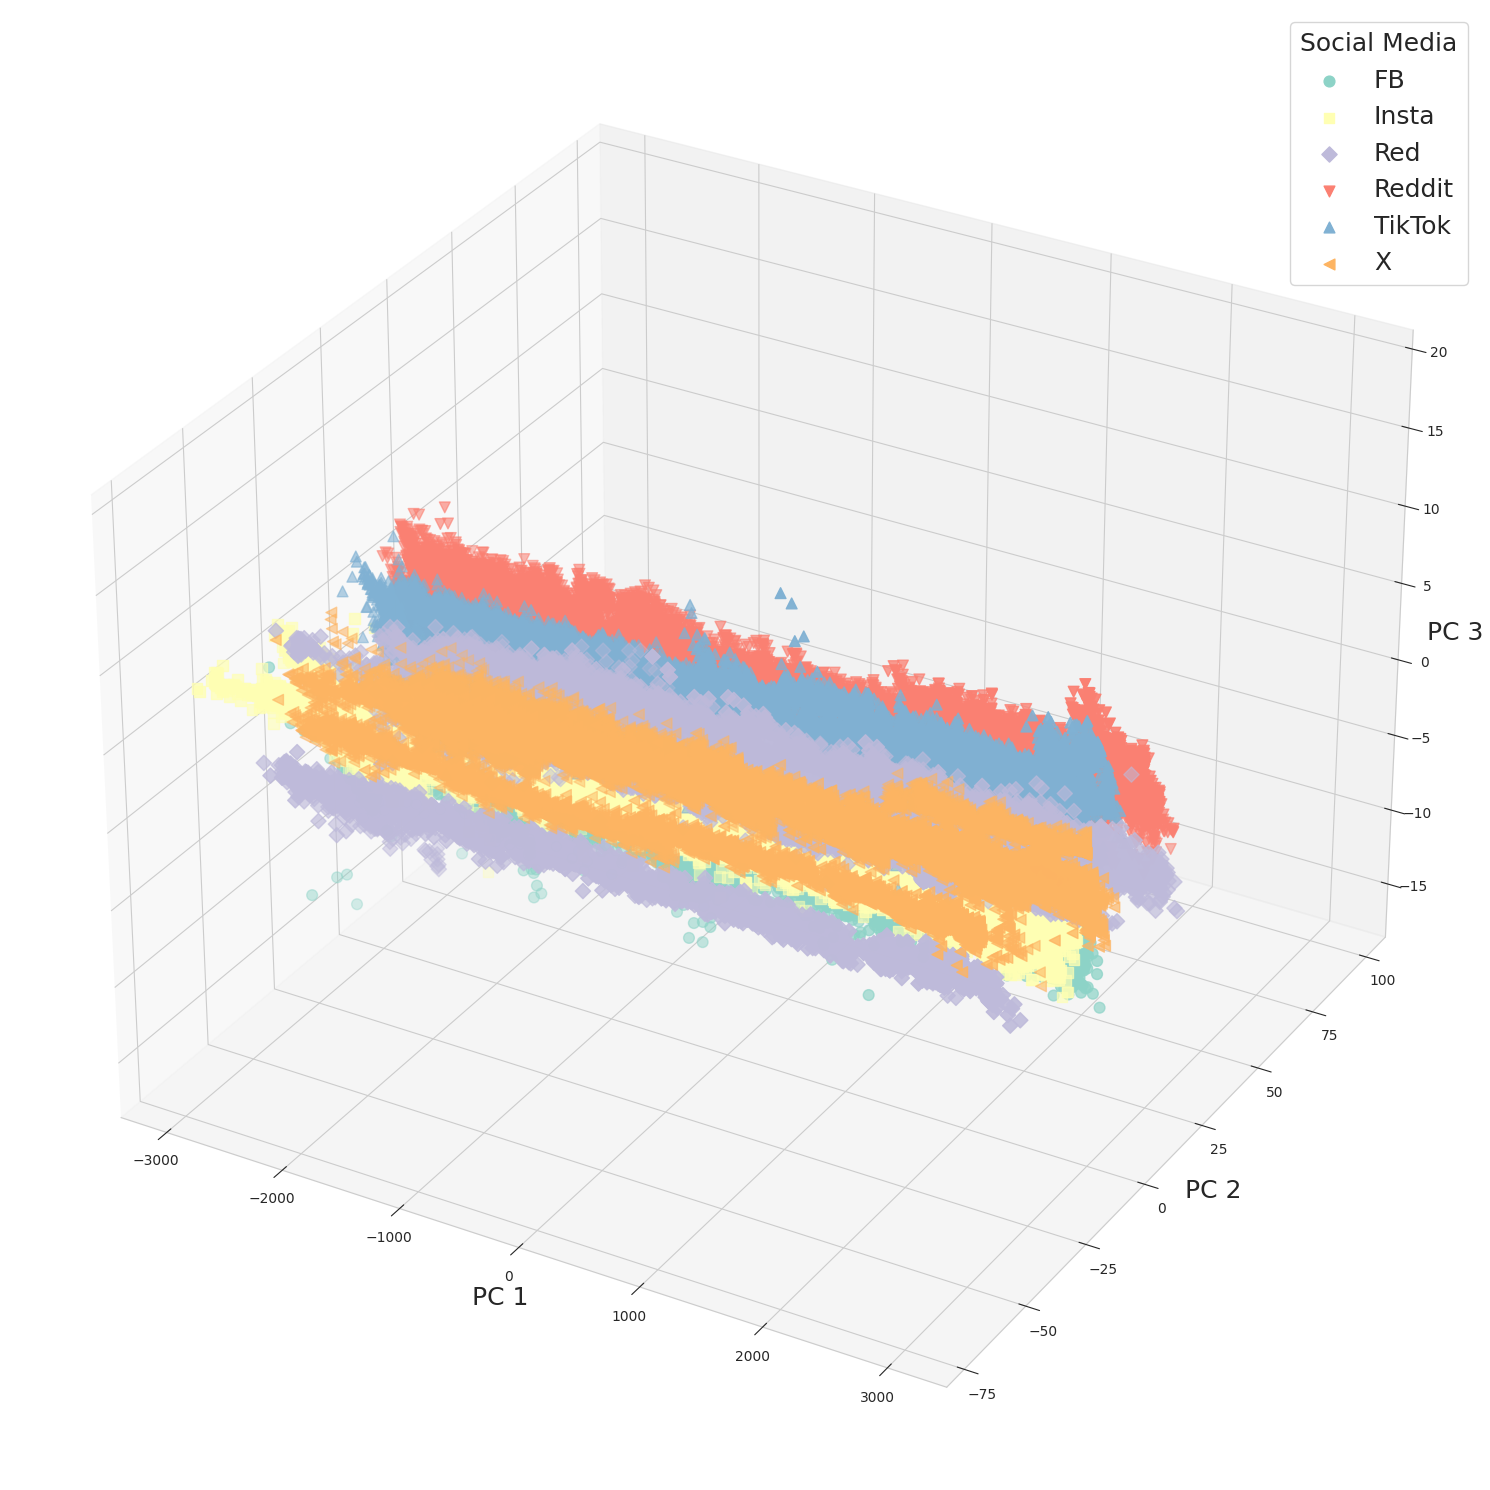

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Extracting the components and the hue variable
x = full_data['pc_1']
y = full_data['pc_2']
z = full_data['pc_3']  # Assuming there's a third principal component
hue = full_data['SM_platform']

# Determine the unique values in the hue variable and assign colors and markers
unique_platforms = full_data['SM_platform'].unique()
markers = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', '*', 'H', 'X', 'd']
chosen_markers = markers[:len(unique_platforms)]
colors = sns.color_palette("Set3", len(unique_platforms))

# Create a dictionary for platform to color and marker mapping
platform_to_color = {platform: colors[i] for i, platform in enumerate(unique_platforms)}
platform_to_marker = {platform: chosen_markers[i] for i, platform in enumerate(unique_platforms)}

# Initialize the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each platform category with its corresponding color and marker
for platform in unique_platforms:
    indices = full_data['SM_platform'] == platform
    ax.scatter(x[indices], y[indices], z[indices], 
               c=np.array([platform_to_color[platform]]), 
               marker=platform_to_marker[platform], 
               label=platform, s=60)  # Adjust s for marker size if needed

# Customize the title and labels
#ax.set_title('Most Important Three Principal Components in the Data', fontsize=16)
ax.set_xlabel("PC 1", fontsize=18)
ax.set_ylabel("PC 2", fontsize=18)
ax.set_zlabel("PC 3", fontsize=18)
ax.legend(title="Social Media", fontsize=18, title_fontsize=18)

# Adjust layout to ensure labels are visible
plt.subplots_adjust(left=0.1, right=2.2, top=2.2, bottom=0.1)

# Show the plot
plt.show()


# Descriptive Statistics (Figure 1)

## Accelerometer

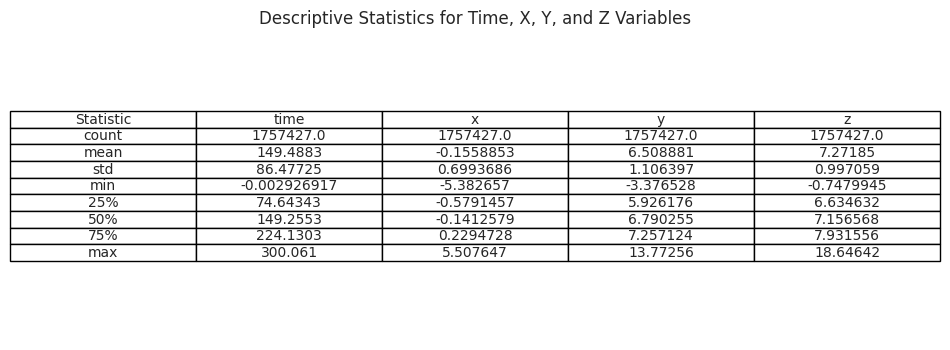

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data
data = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "time": [1.757427e+06, 1.494883e+02, 8.647725e+01, -2.926917e-03, 7.464343e+01, 1.492553e+02, 2.241303e+02, 3.000610e+02],
    "x": [1.757427e+06, -1.558853e-01, 6.993686e-01, -5.382657e+00, -5.791457e-01, -1.412579e-01, 2.294728e-01, 5.507647e+00],
    "y": [1.757427e+06, 6.508881e+00, 1.106397e+00, -3.376528e+00, 5.926176e+00, 6.790255e+00, 7.257124e+00, 1.377256e+01],
    "z": [1.757427e+06, 7.271850e+00, 9.970590e-01, -7.479945e-01, 6.634632e+00, 7.156568e+00, 7.931556e+00, 1.864642e+01]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(12, 4))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Displaying the table
plt.title('Descriptive Statistics for Time, X, Y, and Z Variables')
plt.show()


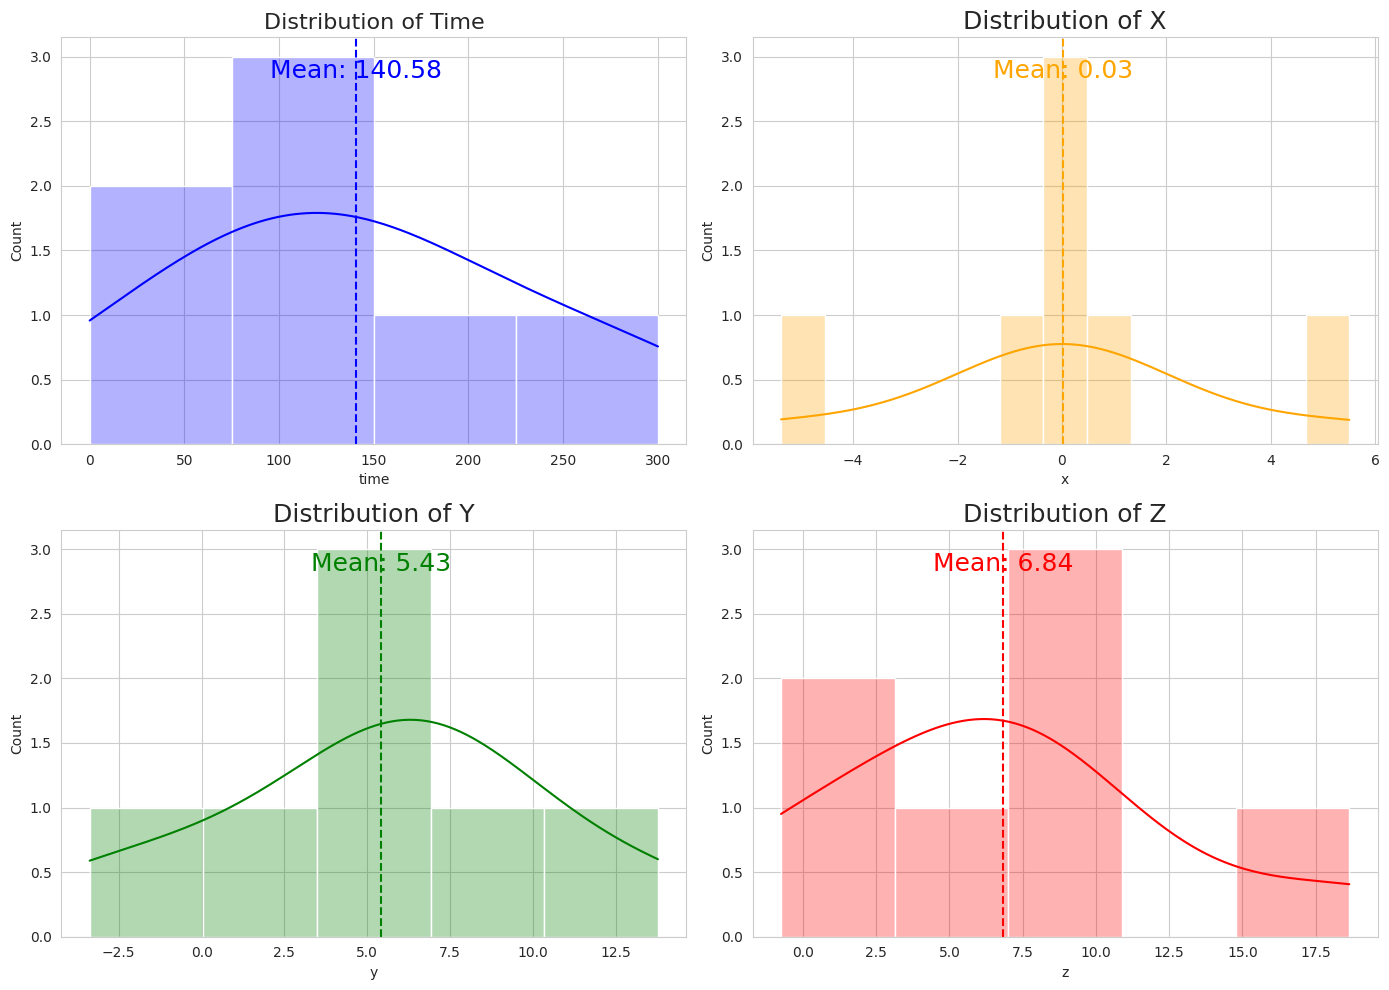

In [71]:
#Dataset 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the data
data = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "time": [1.757427e+06, 1.494883e+02, 8.647725e+01, -2.926917e-03, 7.464343e+01, 1.492553e+02, 2.241303e+02, 3.000610e+02],
    "x": [1.757427e+06, -1.558853e-01, 6.993686e-01, -5.382657e+00, -5.791457e-01, -1.412579e-01, 2.294728e-01, 5.507647e+00],
    "y": [1.757427e+06, 6.508881e+00, 1.106397e+00, -3.376528e+00, 5.926176e+00, 6.790255e+00, 7.257124e+00, 1.377256e+01],
    "z": [1.757427e+06, 7.271850e+00, 9.970590e-01, -7.479945e-01, 6.634632e+00, 7.156568e+00, 7.931556e+00, 1.864642e+01]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Extracting values for plotting (excluding the 'count' statistic)
time_values = df[df['Statistic'] != 'count']['time'].astype(float)
x_values = df[df['Statistic'] != 'count']['x'].astype(float)
y_values = df[df['Statistic'] != 'count']['y'].astype(float)
z_values = df[df['Statistic'] != 'count']['z'].astype(float)

# Creating the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for 'time'
sns.histplot(time_values, kde=True, ax=axs[0, 0], color='blue', alpha=0.3)
axs[0, 0].axvline(time_values.mean(), color='blue', linestyle='--')
axs[0, 0].text(time_values.mean(), max(axs[0, 0].get_ylim())*0.9, f'Mean: {time_values.mean():.2f}', color='blue', ha='center', fontsize=18)
axs[0, 0].set_title('Distribution of Time', fontsize=16)

# Plot for 'x'
sns.histplot(x_values, kde=True, ax=axs[0, 1], color='orange', alpha=0.3)
axs[0, 1].axvline(x_values.mean(), color='orange', linestyle='--')
axs[0, 1].text(x_values.mean(), max(axs[0, 1].get_ylim())*0.9, f'Mean: {x_values.mean():.2f}', color='orange', ha='center', fontsize=18)
axs[0, 1].set_title('Distribution of X', fontsize=18)

# Plot for 'y'
sns.histplot(y_values, kde=True, ax=axs[1, 0], color='green', alpha=0.3)
axs[1, 0].axvline(y_values.mean(), color='green', linestyle='--')
axs[1, 0].text(y_values.mean(), max(axs[1, 0].get_ylim())*0.9, f'Mean: {y_values.mean():.2f}', color='green', ha='center', fontsize=18)
axs[1, 0].set_title('Distribution of Y', fontsize=18)

# Plot for 'z'
sns.histplot(z_values, kde=True, ax=axs[1, 1], color='red', alpha=0.3)
axs[1, 1].axvline(z_values.mean(), color='red', linestyle='--')
axs[1, 1].text(z_values.mean(), max(axs[1, 1].get_ylim())*0.9, f'Mean: {z_values.mean():.2f}', color='red', ha='center', fontsize=18)
axs[1, 1].set_title('Distribution of Z', fontsize=18)

plt.tight_layout()
plt.show()


## Linear Acceleration 

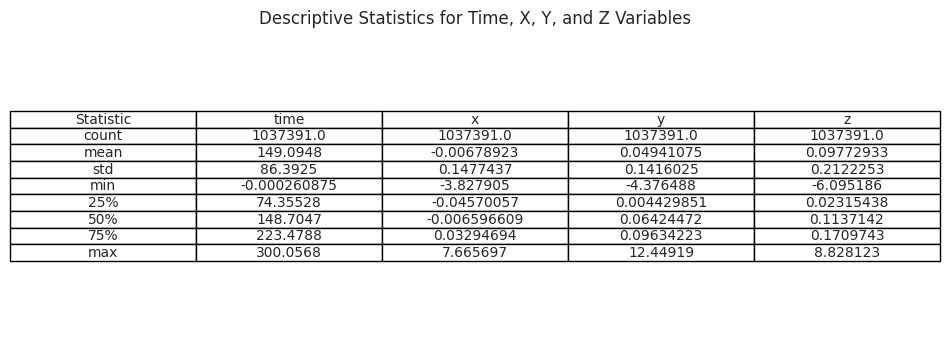

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data
data = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "time": [1.037391e+06, 1.490948e+02, 8.639250e+01, -2.608750e-04, 7.435528e+01, 1.487047e+02, 2.234788e+02, 3.000568e+02],
    "x": [1.037391e+06, -6.789230e-03, 1.477437e-01, -3.827905e+00, -4.570057e-02, -6.596609e-03, 3.294694e-02, 7.665697e+00],
    "y": [1.037391e+06, 4.941075e-02, 1.416025e-01, -4.376488e+00, 4.429851e-03, 6.424472e-02, 9.634223e-02, 1.244919e+01],
    "z": [1.037391e+06, 9.772933e-02, 2.122253e-01, -6.095186e+00, 2.315438e-02, 1.137142e-01, 1.709743e-01, 8.828123e+00]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(12, 4))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Displaying the table
plt.title('Descriptive Statistics for Time, X, Y, and Z Variables')
plt.show()


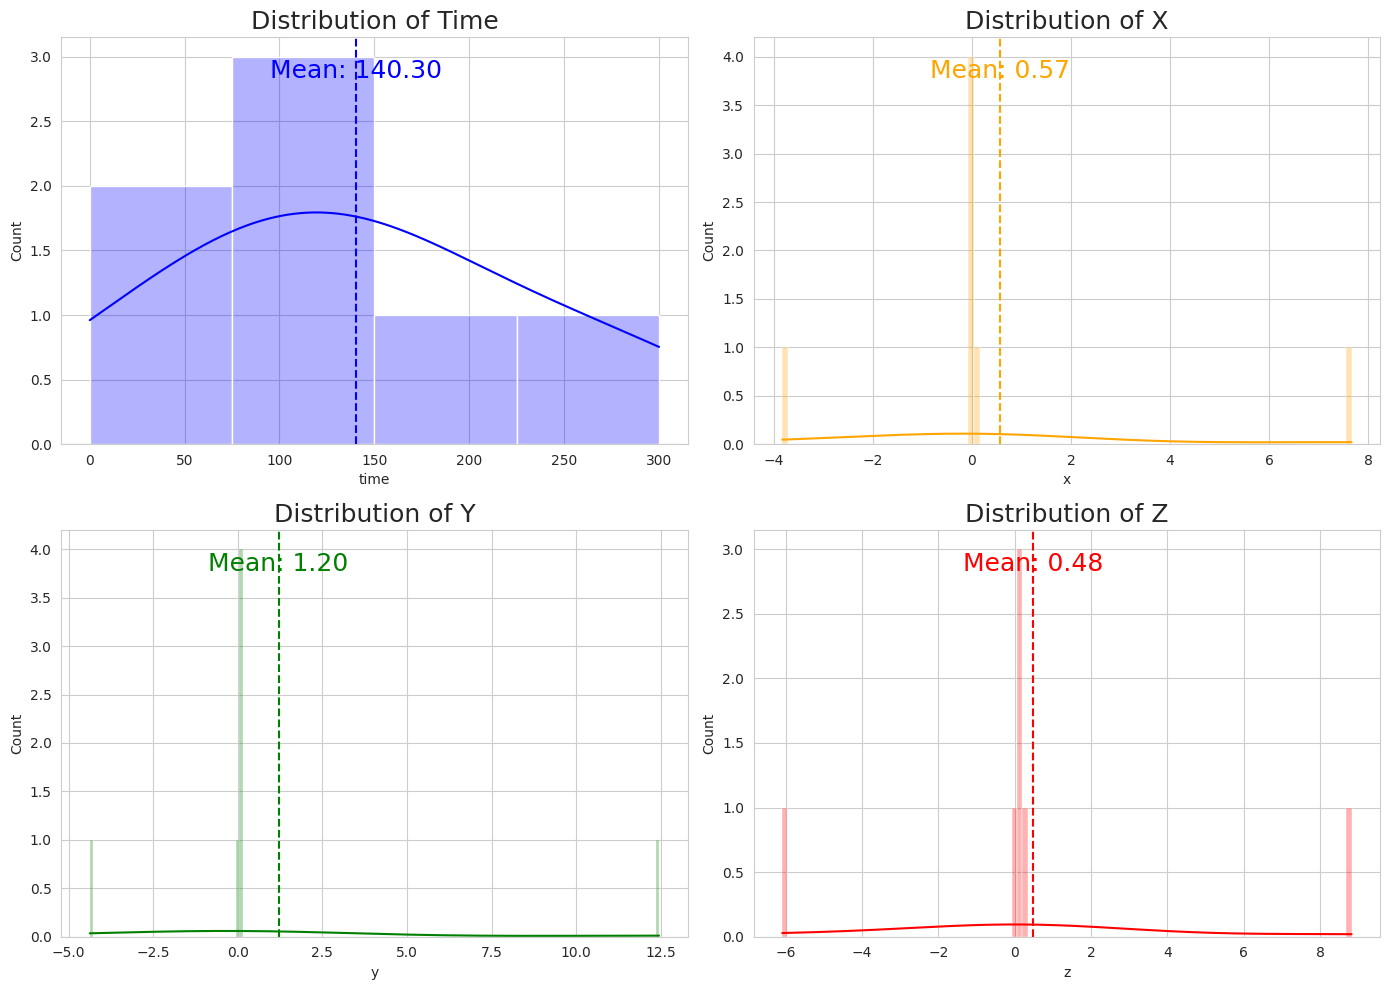

In [72]:
#Dataset 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the data for the first dataset
data1 = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "time": [1.037391e+06, 1.490948e+02, 8.639250e+01, -2.608750e-04, 7.435528e+01, 1.487047e+02, 2.234788e+02, 3.000568e+02],
    "x": [1.037391e+06, -6.789230e-03, 1.477437e-01, -3.827905e+00, -4.570057e-02, -6.596609e-03, 3.294694e-02, 7.665697e+00],
    "y": [1.037391e+06, 4.941075e-02, 1.416025e-01, -4.376488e+00, 4.429851e-03, 6.424472e-02, 9.634223e-02, 1.244919e+01],
    "z": [1.037391e+06, 9.772933e-02, 2.122253e-01, -6.095186e+00, 2.315438e-02, 1.137142e-01, 1.709743e-01, 8.828123e+00]
}

# Creating the DataFrame
df1 = pd.DataFrame(data1)

# Extracting values for plotting (excluding the 'count' statistic)
time_values1 = df1[df1['Statistic'] != 'count']['time'].astype(float)
x_values1 = df1[df1['Statistic'] != 'count']['x'].astype(float)
y_values1 = df1[df1['Statistic'] != 'count']['y'].astype(float)
z_values1 = df1[df1['Statistic'] != 'count']['z'].astype(float)

# Creating the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for 'time'
sns.histplot(time_values1, kde=True, ax=axs[0, 0], color='blue', alpha=0.3)
axs[0, 0].axvline(time_values1.mean(), color='blue', linestyle='--')
axs[0, 0].text(time_values1.mean(), max(axs[0, 0].get_ylim())*0.9, f'Mean: {time_values1.mean():.2f}', color='blue', ha='center', fontsize=18)
axs[0, 0].set_title('Distribution of Time', fontsize=18)

# Plot for 'x'
sns.histplot(x_values1, kde=True, ax=axs[0, 1], color='orange', alpha=0.3)
axs[0, 1].axvline(x_values1.mean(), color='orange', linestyle='--')
axs[0, 1].text(x_values1.mean(), max(axs[0, 1].get_ylim())*0.9, f'Mean: {x_values1.mean():.2f}', color='orange', ha='center', fontsize=18)
axs[0, 1].set_title('Distribution of X', fontsize=18)

# Plot for 'y'
sns.histplot(y_values1, kde=True, ax=axs[1, 0], color='green', alpha=0.3)
axs[1, 0].axvline(y_values1.mean(), color='green', linestyle='--')
axs[1, 0].text(y_values1.mean(), max(axs[1, 0].get_ylim())*0.9, f'Mean: {y_values1.mean():.2f}', color='green', ha='center', fontsize=18)
axs[1, 0].set_title('Distribution of Y', fontsize=18)

# Plot for 'z'
sns.histplot(z_values1, kde=True, ax=axs[1, 1], color='red', alpha=0.3)
axs[1, 1].axvline(z_values1.mean(), color='red', linestyle='--')
axs[1, 1].text(z_values1.mean(), max(axs[1, 1].get_ylim())*0.9, f'Mean: {z_values1.mean():.2f}', color='red', ha='center', fontsize=18)
axs[1, 1].set_title('Distribution of Z', fontsize=18)

plt.tight_layout()
plt.show()


## Gyroscope 

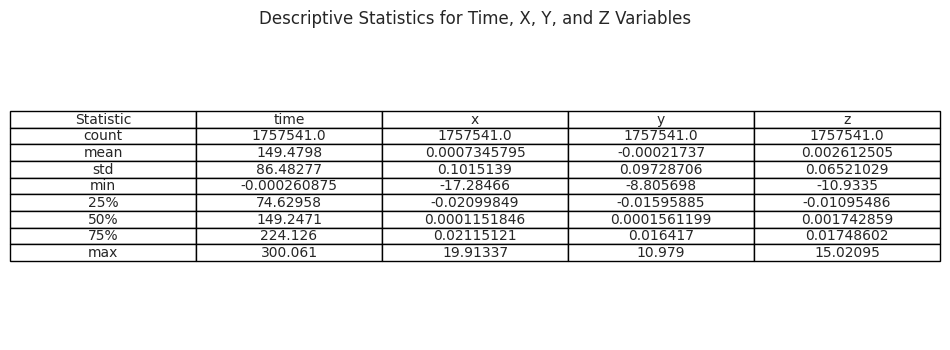

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data
data = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "time": [1.757541e+06, 1.494798e+02, 8.648277e+01, -2.608750e-04, 7.462958e+01, 1.492471e+02, 2.241260e+02, 3.000610e+02],
    "x": [1.757541e+06, 7.345795e-04, 1.015139e-01, -1.728466e+01, -2.099849e-02, 1.151846e-04, 2.115121e-02, 1.991337e+01],
    "y": [1.757541e+06, -2.173700e-04, 9.728706e-02, -8.805698e+00, -1.595885e-02, 1.561199e-04, 1.641700e-02, 1.097900e+01],
    "z": [1.757541e+06, 2.612505e-03, 6.521029e-02, -1.093350e+01, -1.095486e-02, 1.742859e-03, 1.748602e-02, 1.502095e+01]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(12, 4))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Displaying the table
plt.title('Descriptive Statistics for Time, X, Y, and Z Variables')
plt.show()


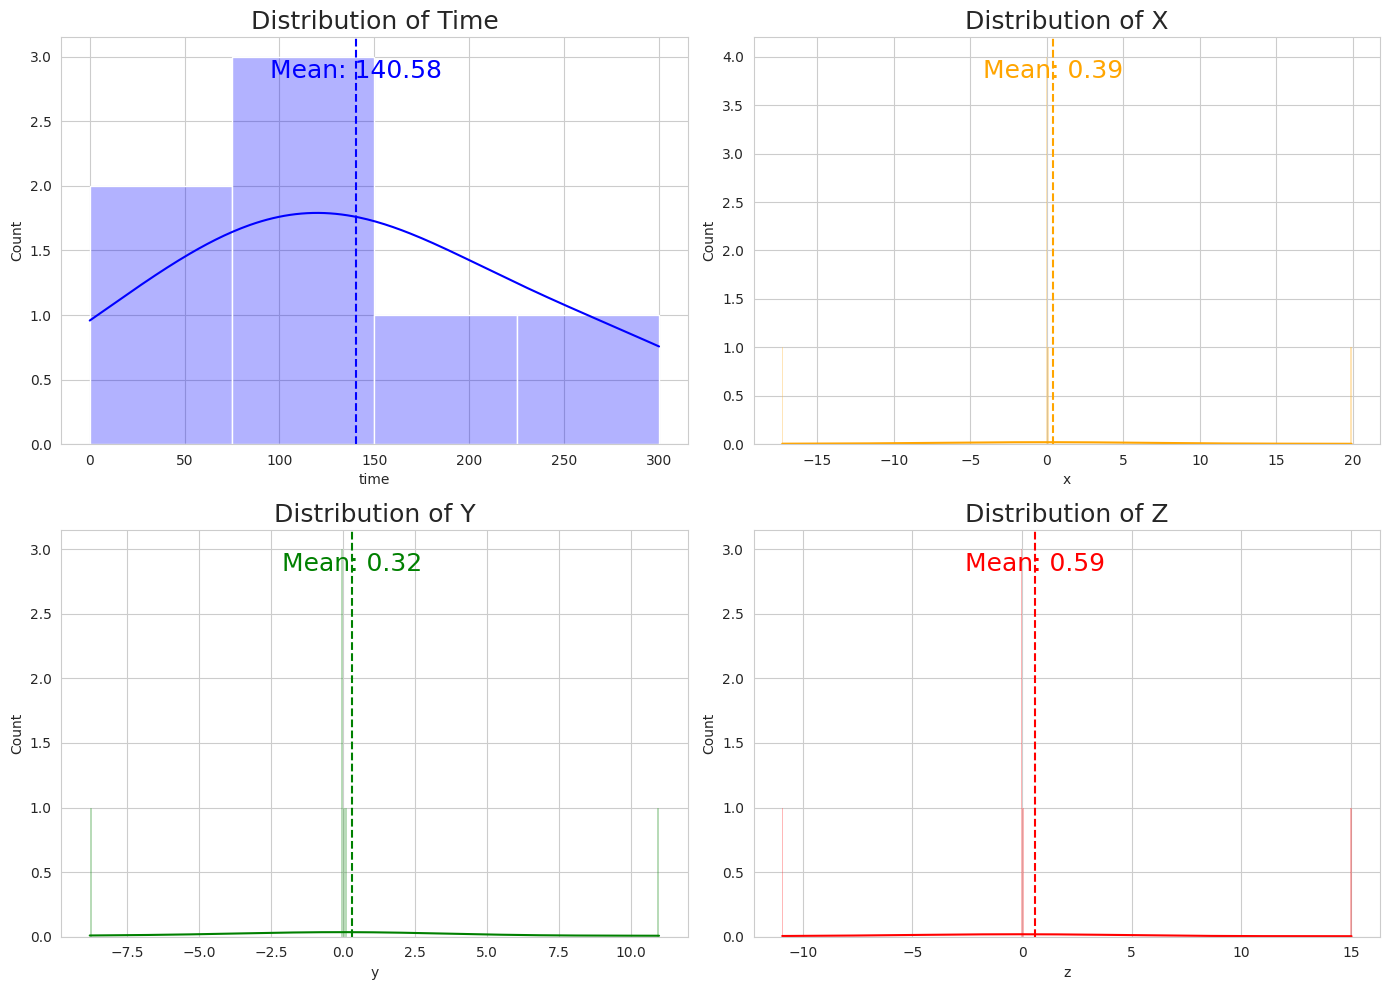

In [73]:
#Dataset 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the data for the second dataset
data2 = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "time": [1.757541e+06, 1.494798e+02, 8.648277e+01, -2.608750e-04, 7.462958e+01, 1.492471e+02, 2.241260e+02, 3.000610e+02],
    "x": [1.757541e+06, 7.345795e-04, 1.015139e-01, -1.728466e+01, -2.099849e-02, 1.151846e-04, 2.115121e-02, 1.991337e+01],
    "y": [1.757541e+06, -2.173700e-04, 9.728706e-02, -8.805698e+00, -1.595885e-02, 1.561199e-04, 1.641700e-02, 1.097900e+01],
    "z": [1.757541e+06, 2.612505e-03, 6.521029e-02, -1.093350e+01, -1.095486e-02, 1.742859e-03, 1.748602e-02, 1.502095e+01]
}

# Creating the DataFrame
df2 = pd.DataFrame(data2)

# Extracting values for plotting (excluding the 'count' statistic)
time_values2 = df2[df2['Statistic'] != 'count']['time'].astype(float)
x_values2 = df2[df2['Statistic'] != 'count']['x'].astype(float)
y_values2 = df2[df2['Statistic'] != 'count']['y'].astype(float)
z_values2 = df2[df2['Statistic'] != 'count']['z'].astype(float)

# Creating the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for 'time'
sns.histplot(time_values2, kde=True, ax=axs[0, 0], color='blue', alpha=0.3)
axs[0, 0].axvline(time_values2.mean(), color='blue', linestyle='--')
axs[0, 0].text(time_values2.mean(), max(axs[0, 0].get_ylim())*0.9, f'Mean: {time_values2.mean():.2f}', color='blue', ha='center', fontsize=18)
axs[0, 0].set_title('Distribution of Time', fontsize=18)

# Plot for 'x'
sns.histplot(x_values2, kde=True, ax=axs[0, 1], color='orange', alpha=0.3)
axs[0, 1].axvline(x_values2.mean(), color='orange', linestyle='--')
axs[0, 1].text(x_values2.mean(), max(axs[0, 1].get_ylim())*0.9, f'Mean: {x_values2.mean():.2f}', color='orange', ha='center', fontsize=18)
axs[0, 1].set_title('Distribution of X', fontsize=18)

# Plot for 'y'
sns.histplot(y_values2, kde=True, ax=axs[1, 0], color='green', alpha=0.3)
axs[1, 0].axvline(y_values2.mean(), color='green', linestyle='--')
axs[1, 0].text(y_values2.mean(), max(axs[1, 0].get_ylim())*0.9, f'Mean: {y_values2.mean():.2f}', color='green', ha='center', fontsize=18)
axs[1, 0].set_title('Distribution of Y', fontsize=18)

# Plot for 'z'
sns.histplot(z_values2, kde=True, ax=axs[1, 1], color='red', alpha=0.3)
axs[1, 1].axvline(z_values2.mean(), color='red', linestyle='--')
axs[1, 1].text(z_values2.mean(), max(axs[1, 1].get_ylim())*0.9, f'Mean: {z_values2.mean():.2f}', color='red', ha='center', fontsize=18)
axs[1, 1].set_title('Distribution of Z', fontsize=18)

plt.tight_layout()
plt.show()


## Barometer

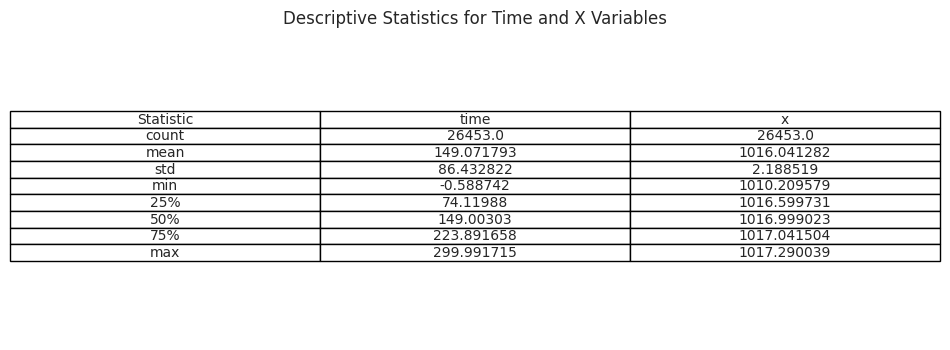

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data
data = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "time": [26453.000000, 149.071793, 86.432822, -0.588742, 74.119880, 149.003030, 223.891658, 299.991715],
    "x": [26453.000000, 1016.041282, 2.188519, 1010.209579, 1016.599731, 1016.999023, 1017.041504, 1017.290039]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(12, 4))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Displaying the table
plt.title('Descriptive Statistics for Time and X Variables')
plt.show()


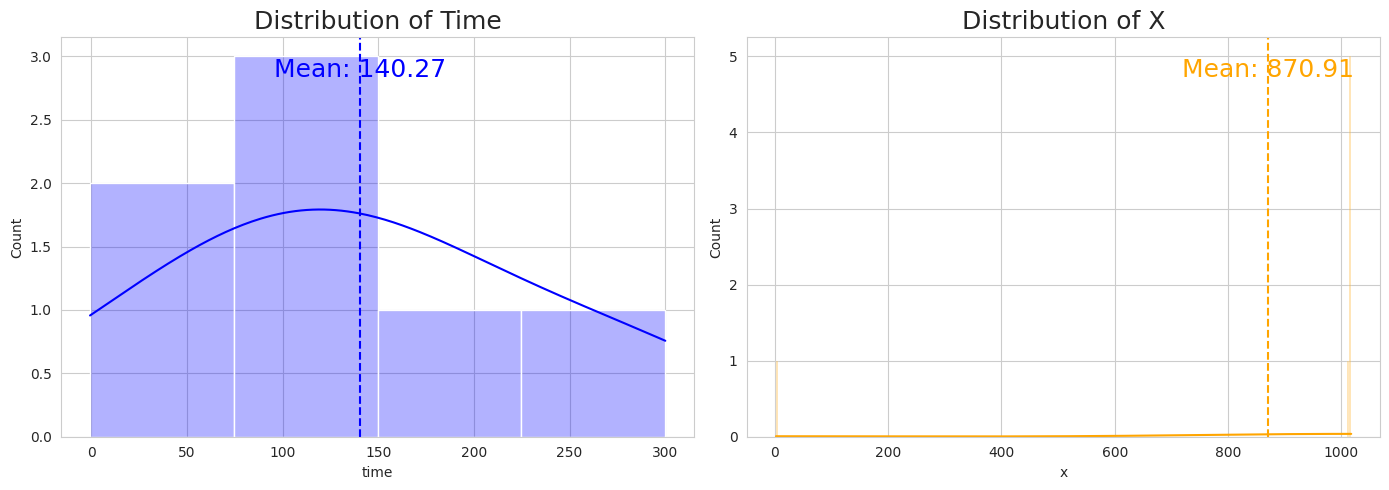

In [74]:
#Datset 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the data for the third dataset
data3 = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "time": [26453.000000, 149.071793, 86.432822, -0.588742, 74.119880, 149.003030, 223.891658, 299.991715],
    "x": [26453.000000, 1016.041282, 2.188519, 1010.209579, 1016.599731, 1016.999023, 1017.041504, 1017.290039]
}

# Creating the DataFrame
df3 = pd.DataFrame(data3)

# Extracting values for plotting (excluding the 'count' statistic)
time_values3 = df3[df3['Statistic'] != 'count']['time'].astype(float)
x_values3 = df3[df3['Statistic'] != 'count']['x'].astype(float)

# Creating the plots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot for 'time'
sns.histplot(time_values3, kde=True, ax=axs[0], color='blue', alpha=0.3)
axs[0].axvline(time_values3.mean(), color='blue', linestyle='--')
axs[0].text(time_values3.mean(), max(axs[0].get_ylim())*0.9, f'Mean: {time_values3.mean():.2f}', color='blue', ha='center', fontsize=18)
axs[0].set_title('Distribution of Time', fontsize=18)

# Plot for 'x'
sns.histplot(x_values3, kde=True, ax=axs[1], color='orange', alpha=0.3)
axs[1].axvline(x_values3.mean(), color='orange', linestyle='--')
axs[1].text(x_values3.mean(), max(axs[1].get_ylim())*0.9, f'Mean: {x_values3.mean():.2f}', color='orange', ha='center', fontsize=18)
axs[1].set_title('Distribution of X', fontsize=18)

plt.tight_layout()
plt.show()


## Combined Visualization of the 4 Variables (Accelerometer/ Linear Acceleration/Gyroscope/Barometer)

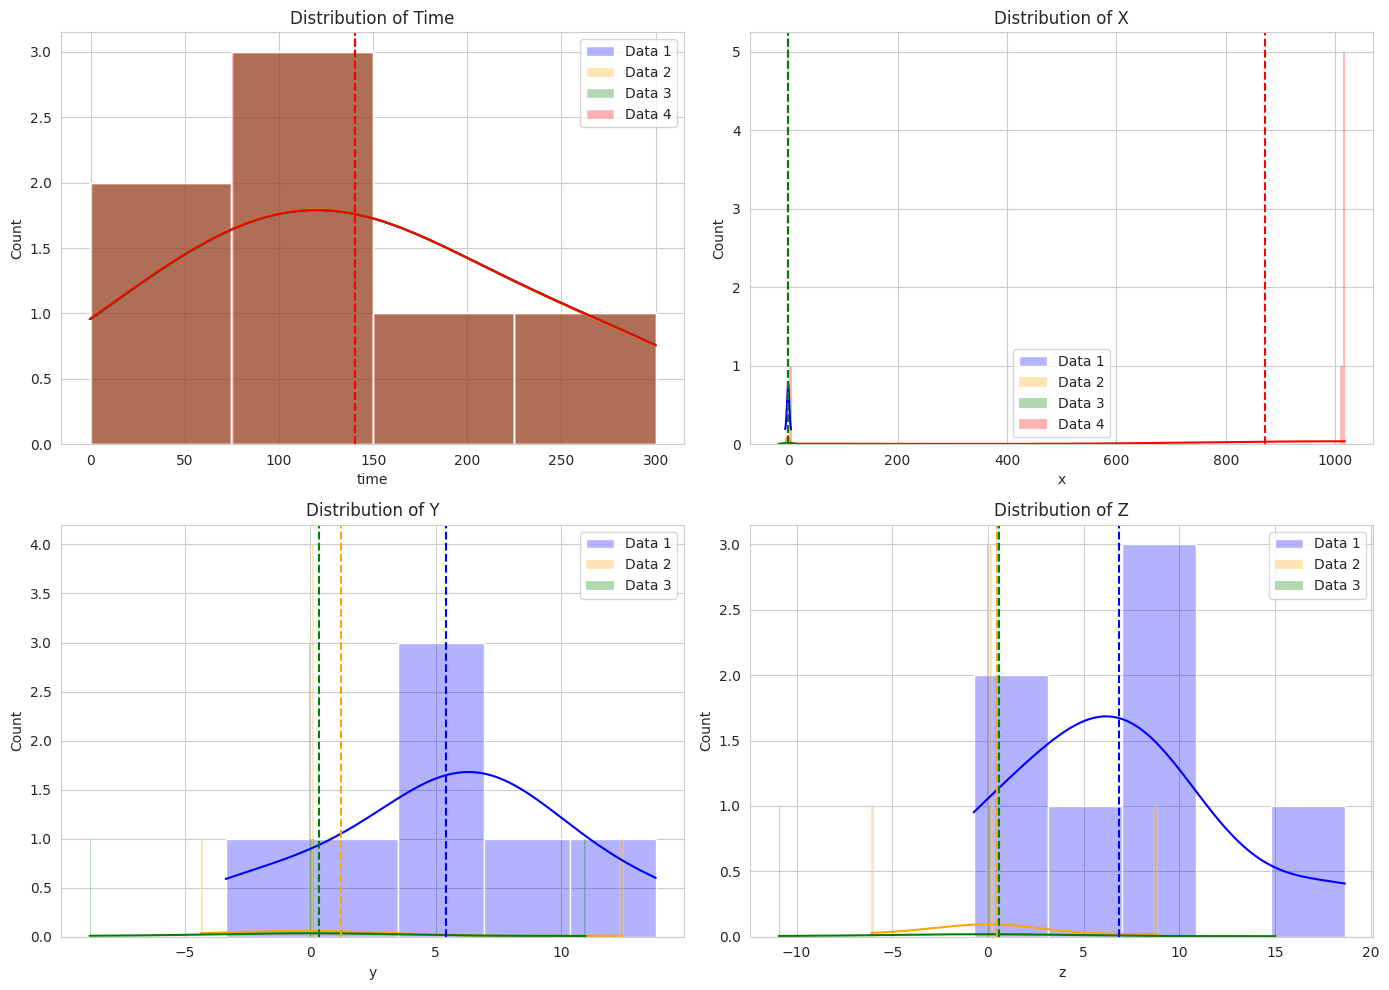

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data 1
data1 = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "time": [1.757427e+06, 1.494883e+02, 8.647725e+01, -2.926917e-03, 7.464343e+01, 1.492553e+02, 2.241303e+02, 3.000610e+02],
    "x": [1.757427e+06, -1.558853e-01, 6.993686e-01, -5.382657e+00, -5.791457e-01, -1.412579e-01, 2.294728e-01, 5.507647e+00],
    "y": [1.757427e+06, 6.508881e+00, 1.106397e+00, -3.376528e+00, 5.926176e+00, 6.790255e+00, 7.257124e+00, 1.377256e+01],
    "z": [1.757427e+06, 7.271850e+00, 9.970590e-01, -7.479945e-01, 6.634632e+00, 7.156568e+00, 7.931556e+00, 1.864642e+01]
}

# Data 2
data2 = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "time": [1.037391e+06, 1.490948e+02, 8.639250e+01, -2.608750e-04, 7.435528e+01, 1.487047e+02, 2.234788e+02, 3.000568e+02],
    "x": [1.037391e+06, -6.789230e-03, 1.477437e-01, -3.827905e+00, -4.570057e-02, -6.596609e-03, 3.294694e-02, 7.665697e+00],
    "y": [1.037391e+06, 4.941075e-02, 1.416025e-01, -4.376488e+00, 4.429851e-03, 6.424472e-02, 9.634223e-02, 1.244919e+01],
    "z": [1.037391e+06, 9.772933e-02, 2.122253e-01, -6.095186e+00, 2.315438e-02, 1.137142e-01, 1.709743e-01, 8.828123e+00]
}

# Data 3
data3 = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "time": [1.757541e+06, 1.494798e+02, 8.648277e+01, -2.608750e-04, 7.462958e+01, 1.492471e+02, 2.241260e+02, 3.000610e+02],
    "x": [1.757541e+06, 7.345795e-04, 1.015139e-01, -1.728466e+01, -2.099849e-02, 1.151846e-04, 2.115121e-02, 1.991337e+01],
    "y": [1.757541e+06, -2.173700e-04, 9.728706e-02, -8.805698e+00, -1.595885e-02, 1.561199e-04, 1.641700e-02, 1.097900e+01],
    "z": [1.757541e+06, 2.612505e-03, 6.521029e-02, -1.093350e+01, -1.095486e-02, 1.742859e-03, 1.748602e-02, 1.502095e+01]
}

# Data 4
data4 = {
    "Statistic": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "time": [26453.000000, 149.071793, 86.432822, -0.588742, 74.119880, 149.003030, 223.891658, 299.991715],
    "x": [26453.000000, 1016.041282, 2.188519, 1010.209579, 1016.599731, 1016.999023, 1017.041504, 1017.290039]
}

# Creating DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)

# Extracting values for plotting (excluding the 'count' statistic)
time_values1 = df1[df1['Statistic'] != 'count']['time'].astype(float)
x_values1 = df1[df1['Statistic'] != 'count']['x'].astype(float)
y_values1 = df1[df1['Statistic'] != 'count']['y'].astype(float)
z_values1 = df1[df1['Statistic'] != 'count']['z'].astype(float)

time_values2 = df2[df2['Statistic'] != 'count']['time'].astype(float)
x_values2 = df2[df2['Statistic'] != 'count']['x'].astype(float)
y_values2 = df2[df2['Statistic'] != 'count']['y'].astype(float)
z_values2 = df2[df2['Statistic'] != 'count']['z'].astype(float)

time_values3 = df3[df3['Statistic'] != 'count']['time'].astype(float)
x_values3 = df3[df3['Statistic'] != 'count']['x'].astype(float)
y_values3 = df3[df3['Statistic'] != 'count']['y'].astype(float)
z_values3 = df3[df3['Statistic'] != 'count']['z'].astype(float)

time_values4 = df4[df4['Statistic'] != 'count']['time'].astype(float)
x_values4 = df4[df4['Statistic'] != 'count']['x'].astype(float)

# Creating the combined plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for 'time'
sns.histplot(time_values1, kde=True, ax=axs[0, 0], color='blue', alpha=0.3, label='Data 1')
sns.histplot(time_values2, kde=True, ax=axs[0, 0], color='orange', alpha=0.3, label='Data 2')
sns.histplot(time_values3, kde=True, ax=axs[0, 0], color='green', alpha=0.3, label='Data 3')
sns.histplot(time_values4, kde=True, ax=axs[0, 0], color='red', alpha=0.3, label='Data 4')
axs[0, 0].axvline(time_values1.mean(), color='blue', linestyle='--')
axs[0, 0].axvline(time_values2.mean(), color='orange', linestyle='--')
axs[0, 0].axvline(time_values3.mean(), color='green', linestyle='--')
axs[0, 0].axvline(time_values4.mean(), color='red', linestyle='--')
axs[0, 0].set_title('Distribution of Time')
axs[0, 0].legend()

# Plot for 'x'
sns.histplot(x_values1, kde=True, ax=axs[0, 1], color='blue', alpha=0.3, label='Data 1')
sns.histplot(x_values2, kde=True, ax=axs[0, 1], color='orange', alpha=0.3, label='Data 2')
sns.histplot(x_values3, kde=True, ax=axs[0, 1], color='green', alpha=0.3, label='Data 3')
sns.histplot(x_values4, kde=True, ax=axs[0, 1], color='red', alpha=0.3, label='Data 4')
axs[0, 1].axvline(x_values1.mean(), color='blue', linestyle='--')
axs[0, 1].axvline(x_values2.mean(), color='orange', linestyle='--')
axs[0, 1].axvline(x_values3.mean(), color='green', linestyle='--')
axs[0, 1].axvline(x_values4.mean(), color='red', linestyle='--')
axs[0, 1].set_title('Distribution of X')
axs[0, 1].legend()

# Plot for 'y'
sns.histplot(y_values1, kde=True, ax=axs[1, 0], color='blue', alpha=0.3, label='Data 1')
sns.histplot(y_values2, kde=True, ax=axs[1, 0], color='orange', alpha=0.3, label='Data 2')
sns.histplot(y_values3, kde=True, ax=axs[1, 0], color='green', alpha=0.3, label='Data 3')
axs[1, 0].axvline(y_values1.mean(), color='blue', linestyle='--')
axs[1, 0].axvline(y_values2.mean(), color='orange', linestyle='--')
axs[1, 0].axvline(y_values3.mean(), color='green', linestyle='--')
axs[1, 0].set_title('Distribution of Y')
axs[1, 0].legend()

# Plot for 'z'
sns.histplot(z_values1, kde=True, ax=axs[1, 1], color='blue', alpha=0.3, label='Data 1')
sns.histplot(z_values2, kde=True, ax=axs[1, 1], color='orange', alpha=0.3, label='Data 2')
sns.histplot(z_values3, kde=True, ax=axs[1, 1], color='green', alpha=0.3, label='Data 3')
axs[1, 1].axvline(z_values1.mean(), color='blue', linestyle='--')
axs[1, 1].axvline(z_values2.mean(), color='orange', linestyle='--')
axs[1, 1].axvline(z_values3.mean(), color='green', linestyle='--')
axs[1, 1].set_title('Distribution of Z')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5ea8f536-739f-4c50-806e-84490cb7d5e0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>